In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [35]:
# Load the datasets
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

# Wrangle the players data; Convert variables to appropriate types
players <- players |>
  mutate(experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"), ordered = TRUE),
    gender = factor(gender),
    subscribe = factor(subscribe),
    played_hours = as.numeric(played_hours),
    Age = as.numeric(Age))

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [54]:
# Clean sessions for analysis, since the time is in milliseconds divide by 1000 and multiply by 60 for minutes
sessions <- sessions |>
  mutate(duration = (as.numeric(original_end_time) - as.numeric(original_start_time)) / (1000 * 60))

In [59]:
players_vars <- tibble(
  Variable = names(players),
  Description = c(
    "experience" = "Player skill level (Factor: Beginner to Pro)",
    "subscribe" = "Subscription status (boolean: TRUE/FALSE)",
    "hashedEmail" = "Anonymized unique ID (character)",
    "played_hours" = "Total hours played (numeric)",
    "name" = "Player name (character)",
    "gender" = "Self-reported gender (factor)",
    "Age" = "Age in years (numeric)"
  )
)
players_vars

Variable,Description
<chr>,<chr>
experience,Player skill level (Factor: Beginner to Pro)
subscribe,Subscription status (boolean: TRUE/FALSE)
hashedEmail,Anonymized unique ID (character)
played_hours,Total hours played (numeric)
name,Player name (character)
gender,Self-reported gender (factor)
Age,Age in years (numeric)


In [60]:
sessions_vars <- tibble(
  Variable = names(sessions),
  Description = c(
    "hashedEmail" = "Anonymized ID linking to players (character)",
    "start_time" = "Session start timestamp DD/MM/YYYY HH:MM (character)",
    "end_time" = "Session end timestamp DD/MM/YYYY HH:MM (character)",
    "original_start_time" = "Unix timestamp in milliseconds (numeric)",
    "original_end_time" = "Unix timestamp in milliseconds (numeric)",
    "duration" = "Calculated session duration in minutes (numeric)"
  )
)
sessions_vars

Variable,Description
<chr>,<chr>
hashedEmail,Anonymized ID linking to players (character)
start_time,Session start timestamp DD/MM/YYYY HH:MM (character)
end_time,Session end timestamp DD/MM/YYYY HH:MM (character)
original_start_time,Unix timestamp in milliseconds (numeric)
original_end_time,Unix timestamp in milliseconds (numeric)
duration,Calculated session duration in minutes (numeric)


In [64]:
n_obs_players <- nrow(players)
n_vars_players <- ncol(players)
n_players <- nrow(players)

n_obs_sessions <- nrow(sessions)
n_vars_sessions <- ncol(sessions)
n_sessions <- nrow(sessions)

n_obs_players
n_vars_players
n_players

n_obs_sessions
n_vars_sessions
n_sessions

[1] 196

[1] 7

[1] 196

[1] 1533

[1] 6

[1] 1533

In [62]:
session_metrics <- sessions |>
  group_by(hashedEmail) |>
  summarize(
    session_count = n(),
    total_session_time = sum(duration, na.rm = TRUE),
    avg_session_duration = mean(duration, na.rm = TRUE)
  )
session_metrics

hashedEmail,session_count,total_session_time,avg_session_duration
<chr>,<int>,<dbl>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2,166.6667,83.33333
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1,0.0000,0.00000
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1,0.0000,0.00000
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,13,666.6667,51.28205
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,2,166.6667,83.33333
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,1,0.0000,0.00000
119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,1,0.0000,0.00000
18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,41,1000.0000,24.39024
1a2b92f18f36b0b59b41d648d10a9b8b20a2adff550ddbcb8cec2f47d4d881d0,1,0.0000,0.00000


In [63]:
means_tbl <- players |>
  summarise(
    mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2),
    mean_age = round(mean(Age, na.rm = TRUE), 2)
  )
means_tbl

mean_played_hours,mean_age
<dbl>,<dbl>
5.85,21.14


In [55]:
sumplay <- summary(players)
sumplay

    experience subscribe   hashedEmail         played_hours    
 Beginner:35   FALSE: 52   Length:196         Min.   :  0.000  
 Amateur :63   TRUE :144   Class :character   1st Qu.:  0.000  
 Regular :36               Mode  :character   Median :  0.100  
 Veteran :48                                  Mean   :  5.846  
 Pro     :14                                  3rd Qu.:  0.600  
                                              Max.   :223.100  
                                                               
     name                         gender         Age       
 Length:196         Agender          :  2   Min.   : 9.00  
 Class :character   Female           : 37   1st Qu.:17.00  
 Mode  :character   Male             :124   Median :19.00  
                    Non-binary       : 15   Mean   :21.14  
                    Other            :  1   3rd Qu.:22.75  
                    Prefer not to say: 11   Max.   :58.00  
                    Two-Spirited     :  6   NA's   :2      

In [56]:
sumsess <- summary(sessions)
sumsess

 hashedEmail         start_time          end_time         original_start_time
 Length:1533        Length:1533        Length:1533        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
 original_end_time      duration     
 Min.   :1.712e+12   Min.   :  0.00  
 1st Qu.:1.716e+12   1st Qu.:  0.00  
 Median :1.719e+12   Median :  0.00  
 Mean   :1.719e+12   Mean   : 48.49  
 3rd Qu.:1.722e+12   3rd Qu.:166.67  
 Max.   :1.727e+12   Max.   :333.33  

In [17]:
summary(players$played_hours)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.100   5.846   0.600 223.100 

In [18]:
summary(players$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   9.00   17.00   19.00   21.14   22.75   58.00       2 

In [19]:
summary(players$experience)

Beginner  Amateur  Regular  Veteran      Pro 
      35       63       36       48       14

In [20]:
summary(players$subscribe)

FALSE  TRUE 
   52   144

In [21]:
summary(players$gender)

Agender            Female              Male        Non-binary 
                2                37               124                15 
            Other Prefer not to say      Two-Spirited 
                1                11                 6

In [22]:
outliers_hours <- sum(players$played_hours > 150, na.rm = TRUE)
zero_hours <- sum(players$played_hours == 0)
low_exp <- nrow(players |> filter(experience %in% c("Veteran", "Pro"), played_hours < 1))
youngest_age <- min(players$Age, na.rm = TRUE)
subscribe_rate <- round(mean(players$subscribe == TRUE)*100, 1)
pro_count <- sum(players$experience == "Pro")
oldest_age <- max(players$Age, na.rm = TRUE)
median_age <- median(players$Age, na.rm = TRUE)

outliers_hours
zero_hours
low_exp
youngest_age
median_age 
oldest_age
subscribe_rate
pro_count 

[1] 3

[1] 85

[1] 50

[1] 9

[1] 19

[1] 58

[1] 73.5

[1] 14

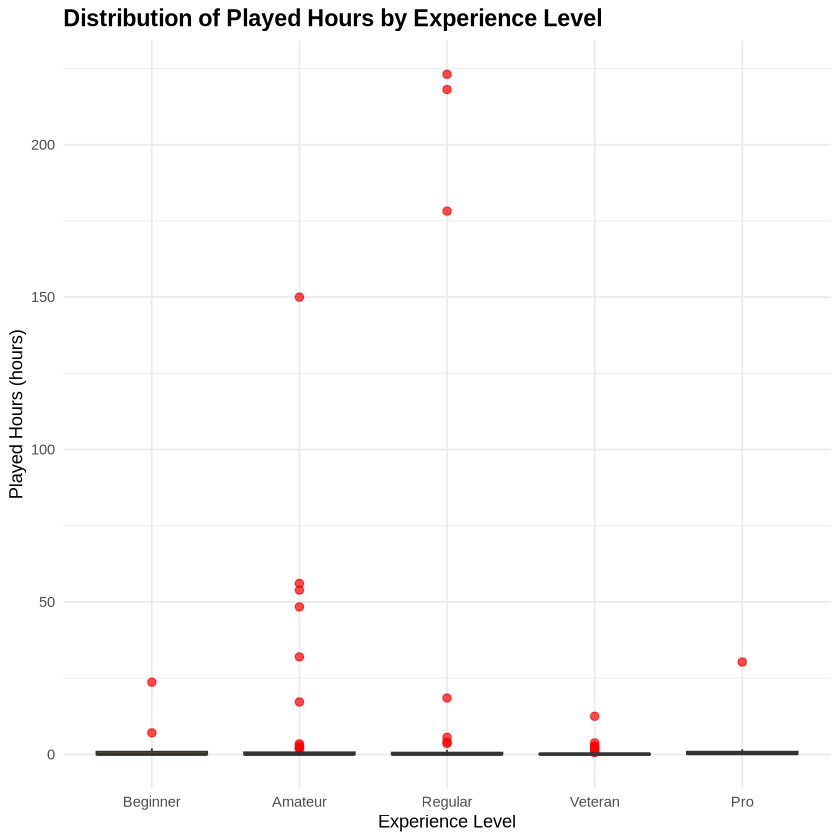

In [24]:
plot1 <- ggplot(players, aes(x = experience, y = played_hours, fill = experience)) +
  geom_boxplot(alpha = 0.7, outlier.color = "red", outlier.size = 2) +
  scale_fill_manual(values = c("Beginner" = "#E69F00", "Amateur" = "#56B4E9", "Regular" = "#009E73", "Veteran" = "#F0E442", "Pro" = "#D55E00")) +
  labs(
    title = "Distribution of Played Hours by Experience Level",
    x = "Experience Level",
    y = "Played Hours (hours)"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(size = 10, color = "gray40"),
    legend.position = "none"
  )
plot1

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


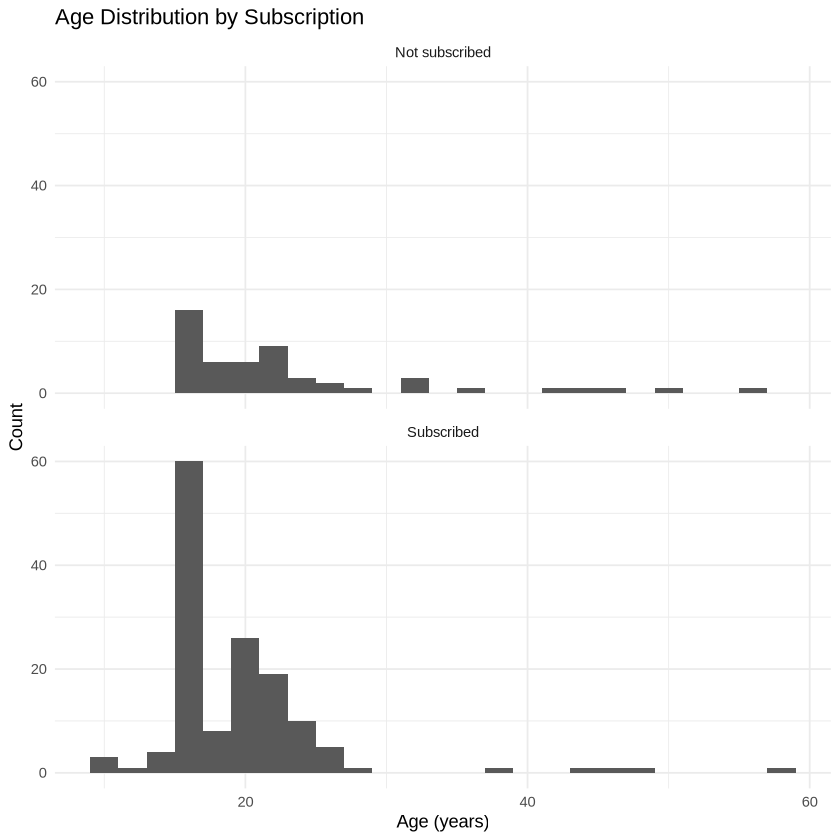

In [26]:
plot2 <- ggplot(players, aes(x = Age)) +
  geom_histogram(binwidth = 2) +
  facet_wrap(~ subscribe, ncol = 1,
             labeller = as_labeller(c(`TRUE`="Subscribed", `FALSE`="Not subscribed"))) +
  labs(title = "Age Distribution by Subscription",
       x = "Age (years)", y = "Count") +
  theme_minimal()
plot2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


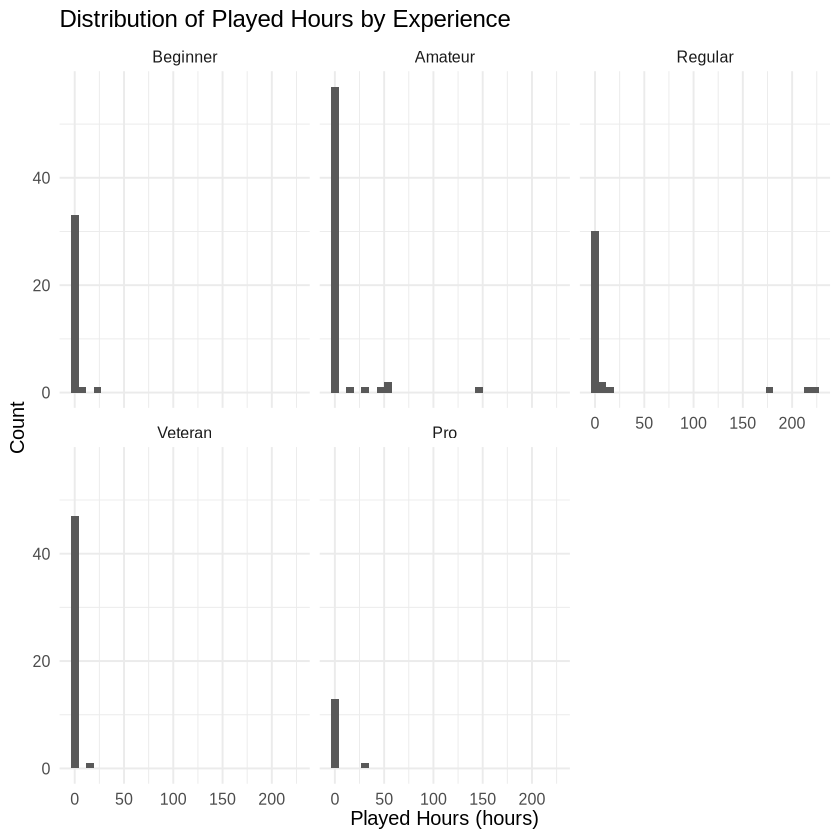

In [27]:
plot3 <- ggplot(players, aes(x = played_hours)) +
  geom_histogram() +
  facet_wrap(~ experience) +
  labs(
    title = "Distribution of Played Hours by Experience",
    x = "Played Hours (hours)",
    y = "Count"
  ) +
  theme_minimal(base_size = 12)
plot3

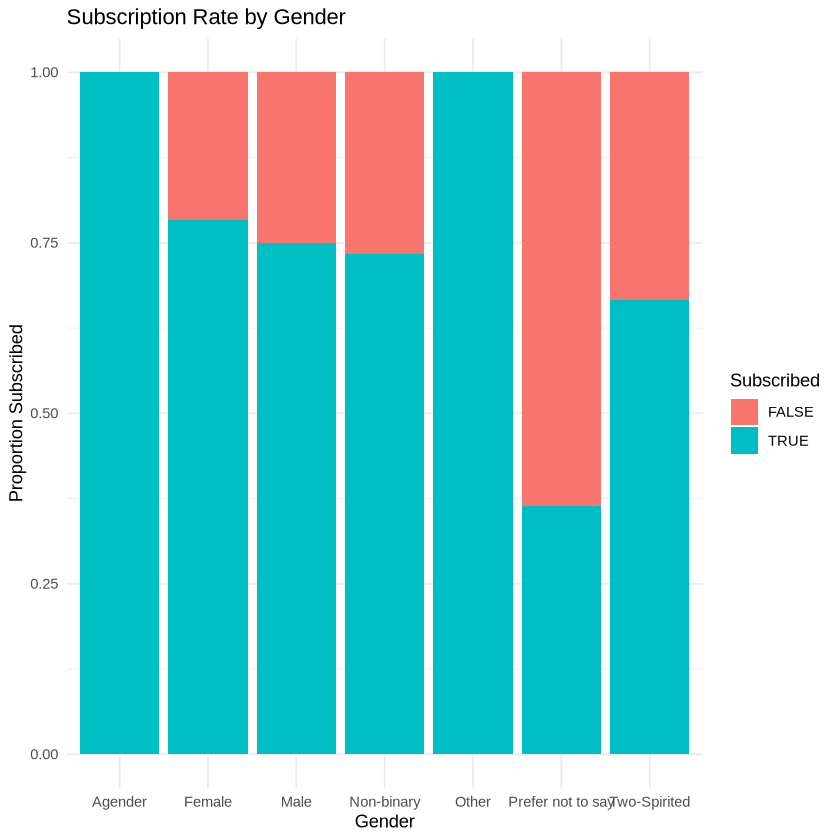

In [28]:
plot4 <- ggplot(players, aes(x = gender, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(title = "Subscription Rate by Gender",
       x = "Gender", y = "Proportion Subscribed",
       fill = "Subscribed") +
  theme_minimal()
plot4

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


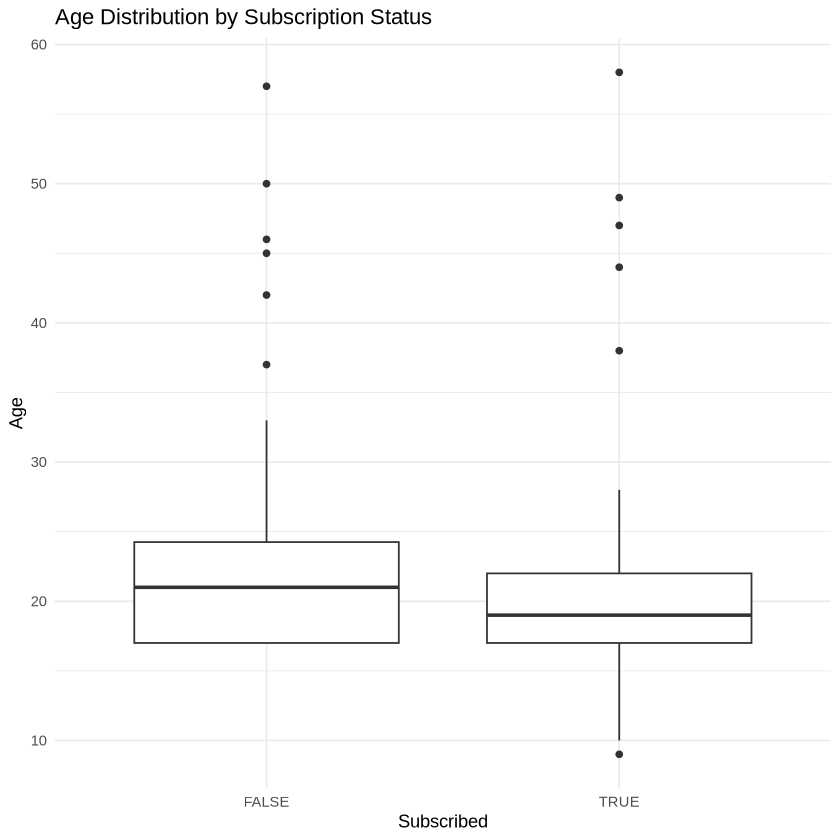

In [29]:
plot5 <- ggplot(players, aes(x = subscribe, y = Age)) +
  geom_boxplot() +
  labs(title = "Age Distribution by Subscription Status",
       x = "Subscribed", y = "Age") +
  theme_minimal()
plot5

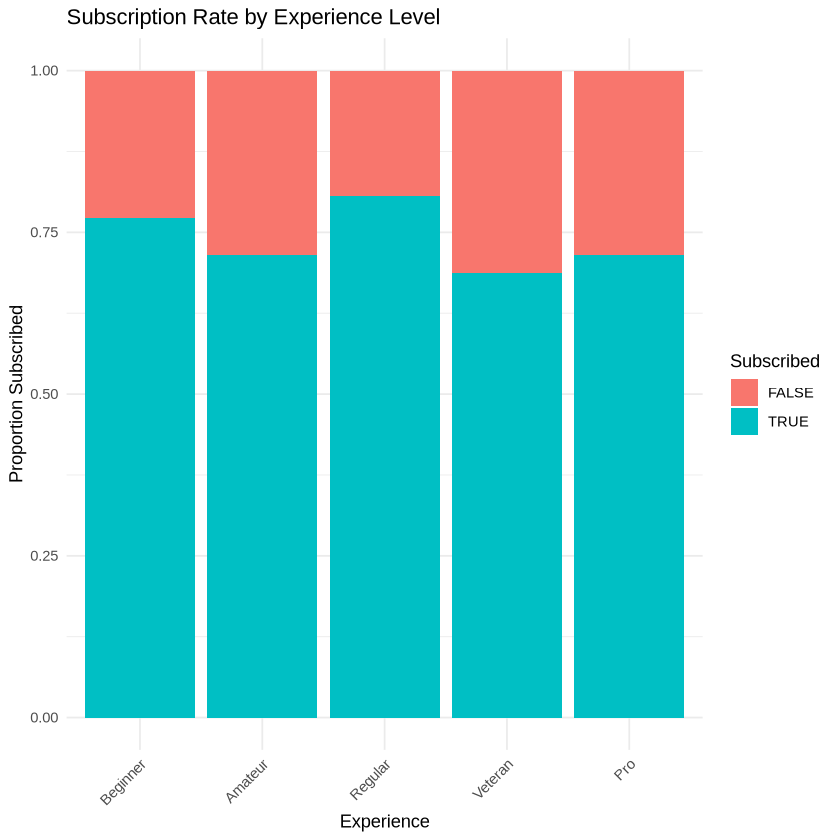

In [30]:
plot6 <- ggplot(players, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(title = "Subscription Rate by Experience Level",
       x = "Experience", y = "Proportion Subscribed",
       fill = "Subscribed") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
plot6

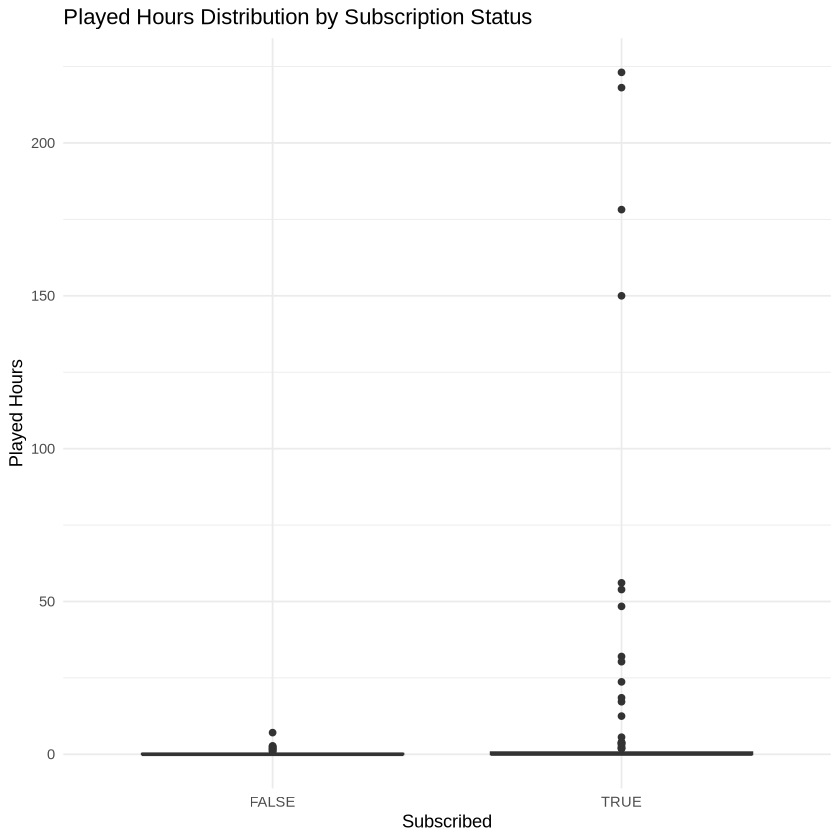

In [31]:
plot7 <- ggplot(players, aes(x = subscribe, y = played_hours)) +
  geom_boxplot() +
  labs(title = "Played Hours Distribution by Subscription Status",
       x = "Subscribed", y = "Played Hours") +
  theme_minimal()
plot7

In [43]:
session_metrics <- sessions %>%
  group_by(hashedEmail) %>%
  summarize(
    session_count = n(),
    total_session_time = sum(duration, na.rm = TRUE),
    avg_session_duration = mean(duration, na.rm = TRUE)
  )
session_metrics

hashedEmail,session_count,total_session_time,avg_session_duration
<chr>,<int>,<dbl>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2,166.6667,83.33333
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1,0.0000,0.00000
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1,0.0000,0.00000
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,13,666.6667,51.28205
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,2,166.6667,83.33333
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,1,0.0000,0.00000
119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,1,0.0000,0.00000
18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,41,1000.0000,24.39024
1a2b92f18f36b0b59b41d648d10a9b8b20a2adff550ddbcb8cec2f47d4d881d0,1,0.0000,0.00000


In [45]:
players_full <- players |>
  left_join(session_metrics, by = "hashedEmail") 
players_full

experience,subscribe,hashedEmail,played_hours,name,gender,Age,session_count,total_session_time,avg_session_duration
<ord>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<int>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27,2000.0000,74.07407
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3,166.6667,55.55556
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1,0.0000,0.00000
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1,0.0000,0.00000
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1,0.0000,0.00000
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,0,0.0000,0.00000
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,0,0.0000,0.00000
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,1,0.0000,0.00000
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47,1,0.0000,0.00000


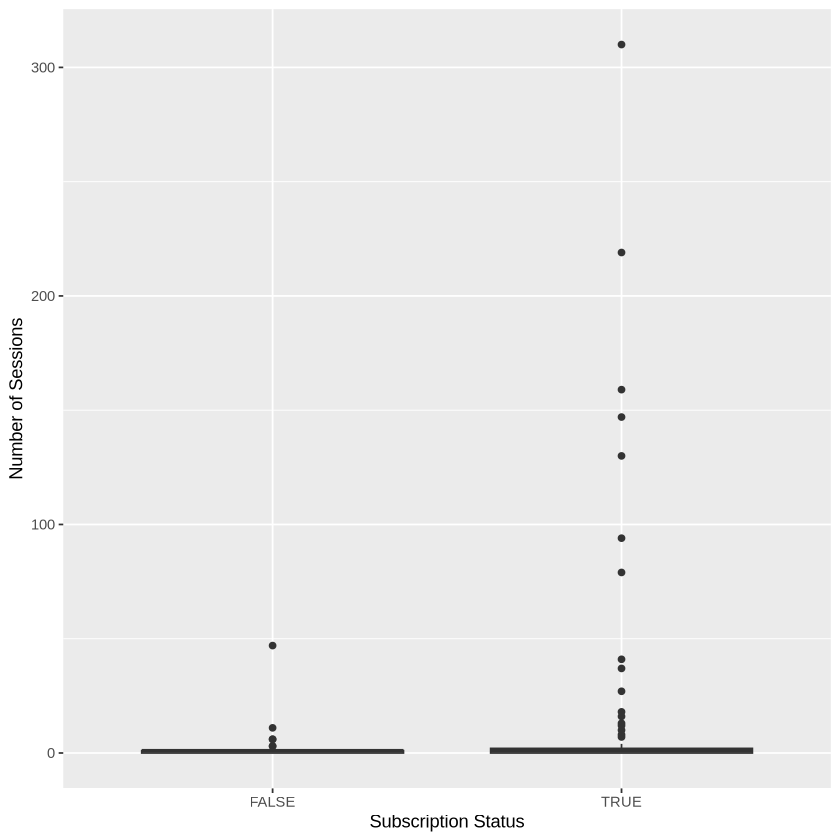

In [52]:
plot8 <- ggplot(players_full, aes(x = subscribe, y = session_count)) +
  geom_boxplot() +
  labs(x = "Subscription Status", y = "Number of Sessions")
plot8

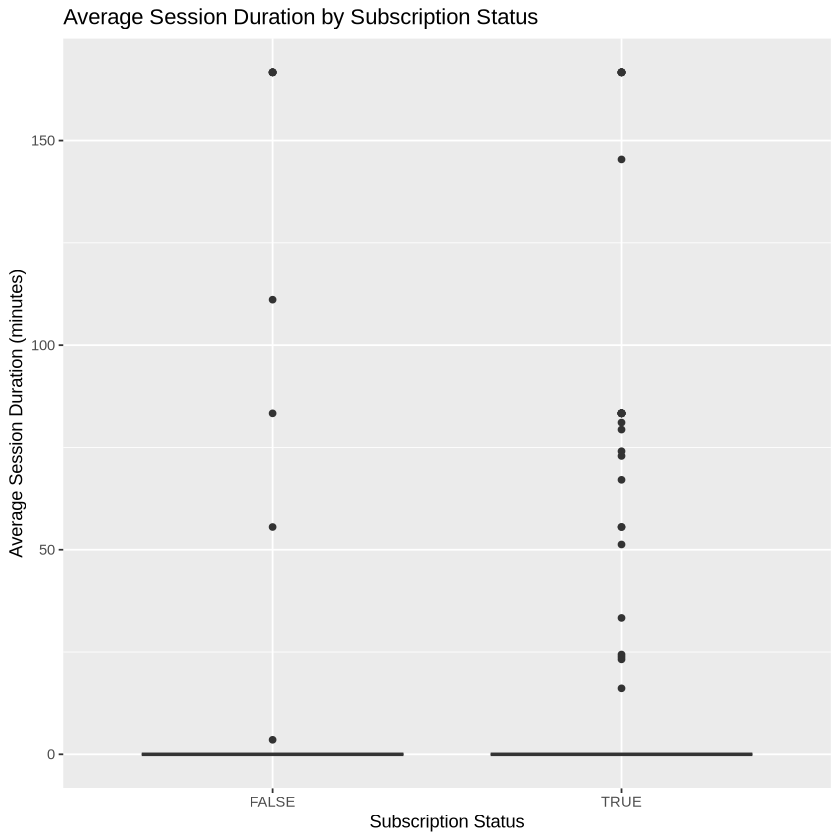

In [53]:
plot9 <- ggplot(players_full, aes(x = subscribe, y = avg_session_duration)) +
  geom_boxplot() +
  labs(
    title = "Average Session Duration by Subscription Status",
    x = "Subscription Status",
    y = "Average Session Duration (minutes)"
  )
plot9